In [34]:
# global
homedir = "/u/az6922/"

import random
def generate_srclinkratearr(rttaverage,size,rseed=0):
    random.seed(rseed)
    rateaverage = (rttaverage-1)//2
    diffarr = [random.randint(-rateaverage+1, rateaverage) for _ in range(size)]
    # required_sum = rateaverage * size
    # current_sum = sum(ratearr)1_
    # last_rate = required_sum - current_sum
    # ratearr.append(last_rate)
    ratearr = [rateaverage+diff for diff in diffarr]
    return ratearr

import pickle
import os
def load_stats(dir,q=1,numqueues=2,numports=2,p=0):
    timelist = list()
    bufferpctlist = list()
    qlenlist = list()
    sentlist = list()
    thptlist = list()
    droplist = list()
    threslist = list()
    for i in range(numports * numqueues):
        qlenlist.append(list())
        sentlist.append(list())
        thptlist.append(list())
        droplist.append(list())
        threslist.append(list())

    with open(dir+"tor.tr", 'r') as f:
        lines = f.readlines()[1:-1]
        for line in lines:
            if line.startswith("\x00"): continue
            tokens = line.split()
            timestamp = int(tokens[0])
            buffer = float(tokens[2])
            for i in range(numports * numqueues):
                qlenlist[i].append(int(tokens[3+i*5]))
            for i in range(numports * numqueues):
                thptlist[i].append(float(tokens[3+i*5+1]))
            for i in range(numports * numqueues):
                sentlist[i].append(int(tokens[3+i*5+2]))
            for i in range(numports * numqueues):
                droplist[i].append(int(tokens[3+i*5+3]))
            for i in range(numports * numqueues):
                threslist[i].append(int(tokens[3+i*5+4]))
            timelist.append(timestamp)
            bufferpctlist.append(buffer)
    
    return [timelist,qlenlist[p*numqueues+q],sentlist[p*numqueues+q],thptlist[p*numqueues+q],droplist[p*numqueues+q],threslist[p*numqueues+q]]

def load_output_log(dir):
    # LOG +1.19381e+10ns 316500
    timelist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("LOG"): continue
            tokens = line.split()
            timelist.append(float(tokens[1].rstrip('ns')))
            minbufferlist.append(int(tokens[2]))
    return [timelist,minbufferlist]

def load_output_log_probe(dir):
    # +...ns(time),cmsa,sent,totalbw,n,m,b
    timelist = list()
    cmsalist = list()
    sentlist = list()
    targetlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            timelist.append(float(tokens[0].rstrip('ns')))
            cmsa=int(tokens[1])
            cmsalist.append(cmsa)
            sentlist.append(int(tokens[2]))
            totalbw=float(tokens[3])
            n=int(tokens[4])
            m=float(tokens[5])
            b=float(tokens[6])
            target=float(tokens[7].rstrip('\n'))
            targetlist.append(target)
    return [timelist,cmsalist,sentlist,targetlist]

def load_output_data(dir):
    # DATA,+1.1099e+11ns,93000,6241500,19500
    cmsalist = list()
    sentlist = list()
    minbufferlist = list()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith("DATA"): continue
            tokens = line.split(',')
            cmsalist.append(int(tokens[2]))
            sentlist.append(int(tokens[3]))
            minbufferlist.append(int(tokens[4]))
    return [cmsalist,sentlist,minbufferlist]

def load_output_convergence(dir):
    # +5.54904e+10ns,39800,6243000,6243001,16500,97,0,0,0,39800,0
    # time,cmsa,sent,3,minbuffer,5,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    # timelist = list()
    # cmsalist = list()
    # sentlist = list()
    # minbufferlist = list()
    # mlist = list()
    # blist = list()
    # targetlist = list()
    # minfulllist = list()
    # maxnonfulllist = list()

    # +2.7799e+11ns,45,90950,6241500,6243001,4500,528,0,0,0,90950,90350
    # time,proberid,cmsa,sent,4,minbuffer,6,m,b,target,currmin_full_buffer,currmax_nonfull_buffer
    timedict = dict()
    cmsadict = dict()
    sentdict = dict()
    minbufferdict = dict()
    mdict = dict()
    bdict = dict()
    targetdict = dict()
    minfulldict = dict()
    maxnonfulldict = dict()
    with open(dir+"output.tr", 'r') as f:
        lines = f.readlines()
        for line in lines:
            if not line.startswith('+'): continue
            tokens = line.split(',')
            if tokens[1]=="pass" or tokens[1]=="maxbuffer": continue
            proberid = int(tokens[1])
            if proberid not in timedict:
                timedict[proberid] = list()
                cmsadict[proberid] = list()
                sentdict[proberid] = list()
                minbufferdict[proberid] = list()
                mdict[proberid] = list()
                bdict[proberid] = list()
                targetdict[proberid] = list()
                minfulldict[proberid] = list()
                maxnonfulldict[proberid] = list()
            timedict[proberid].append(float(tokens[0].rstrip('ns')))
            cmsadict[proberid].append(int(tokens[2]))
            sentdict[proberid].append(int(tokens[3]))
            minbufferdict[proberid].append(int(tokens[5]))
            mdict[proberid].append(float(tokens[7]))
            bdict[proberid].append(float(tokens[8]))
            targetdict[proberid].append(float(tokens[9]))
            minfulldict[proberid].append(int(tokens[10]))
            maxnonfulldict[proberid].append(int(tokens[11]))
    # return [timelist,cmsalist,sentlist,minbufferlist,mlist,blist,targetlist,minfulllist,maxnonfulllist]
    return [timedict,cmsadict,sentdict,minbufferdict,mdict,bdict,targetdict,minfulldict,maxnonfulldict]

def load_bct(dir,numsender,startsender,simend,numburst):
    startlist = list()
    endlist = list()
    for i in range(numsender):
        with open(f"{dir}gpt_sender{i+startsender}_app0.tr",'r') as f:
            lines = f.readlines()
            for j in range(numburst):
                if len(lines) > j: startlist.append(int(lines[j].split()[0]))
                if len(lines) < numburst*2 and (len(lines)-numburst) < (j+1):
                    endlist.append(simend*1000000)
                else:
                    endlist.append(int(lines[j+numburst].split()[0]))
    return [startlist,endlist]

def load_gpt(dir,numsender):
    # 2100 FlowId 1000 TotalBytes 5611000 SocketState 4 TcpCongState 0 GoodputRxBytes 369240 ThisGoodputRxBytes 369240
    returnlist = list()
    for i in range(numsender):
        timemslist = list()
        thptlist = list()
        gptlist = list()
        with open(f"{dir}gpt_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            for line in lines:
                tokens = line.split()
                timemslist.append(int(tokens[0]))
                thptlist.append(int(tokens[4]))
                gptlist.append(int(tokens[10]))
        returnlist.append([timemslist,thptlist,gptlist])
    return returnlist

def load_fct(dir,numsender,startsender):
    # 51022105 FlowId 20000 TotalBytes 5241760
    # 71516996 FlowId 20000 TotalBytes 10000000
    returnlist = list()
    for i in range(startsender,startsender+numsender):
        with open(f"{dir}fct_sender{i}_app0.tr",'r') as f:
            lines = f.readlines()
            if len(lines) < 2:
                returnlist.append(0)
            else:
                startfct = int(lines[0].split()[0])
                endfct = int(lines[1].split()[0])
                returnlist.append(endfct-startfct)
    return returnlist

def load_output_zero(fdir):
    intervallist = list()
    shouldstart = False
    with open(f"{fdir}output.tr",'r') as f:
        lines = f.readlines()
        for line in lines:
            tokens = line.split(',')
            if shouldstart:
                intervalstart = int(tokens[0])
                interval = int(tokens[1])
                intervallist.append([intervalstart,intervalstart+interval])
            else:
                if tokens[0]=="DesignZeroVec":
                    shouldstart = True
    return intervallist

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

def linear_regression(xarr,yarr):
    x = np.array(xarr)
    y = np.array(yarr)

    # Number of data points
    N = len(x)

    # Calculate the slope (m) and intercept (b) using the formulas
    # m = (N * Σ(xi * yi) - Σxi * Σyi) / (N * Σ(xi^2) - (Σxi)^2)
    # b = (Σyi - m * Σxi) / N

    # Calculate sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x_squared = np.sum(x**2)

    # Calculate the slope (m) and intercept (b)
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)
    b = (sum_y - m * sum_x) / N

    # # Display the equation of the best-fit line
    # print(f"Slope: {m:.2f}, Intercept: {b:.2f}")

    # # Create the best-fit line using the model equation
    # y_pred = m * x + b

    return [m,b]

def get_targetbw(cca,nfstr,rttstr):
    with open(f"{homedir}Buffer/experiments/bulk_dec2624/cca{cca}_maxthpt.txt") as fread:
        lines = fread.readlines()
        for line in lines:
            tokens = line.split(',')
            if nfstr==tokens[0] and rttstr==tokens[1]:
                targetbw_raw = float(tokens[2])
                break
    targetbw = int(((targetbw_raw // 1500)+1) * 1500+1)
    return targetbw

def merge_intervals(intervals):
    if not intervals:
        return []

    merged = [intervals[0]]  # Start with the first interval

    for start, end in intervals[1:]:
        last_start, last_end = merged[-1]

        # If the end of the last interval matches the start of the new interval, merge them
        if last_end == start:
            merged[-1] = (last_start, end)  # Extend the last interval
        else:
            merged.append((start, end))  # Otherwise, add it as a new interval

    return merged

In [35]:
smoothwindow = 100
smoothcollection = 500
midbw = 1000
sim=200

ccanamearr=["cubic","bbr","realmix"]
numflownamearr=["small","large"]
rttarr=[50,300]
confseedarr = range(5)

In [37]:
with open(f'{homedir}az6922_data/pickle/thpt_incomplete.pickle', 'rb') as handle:
    datadict = pickle.load(handle)

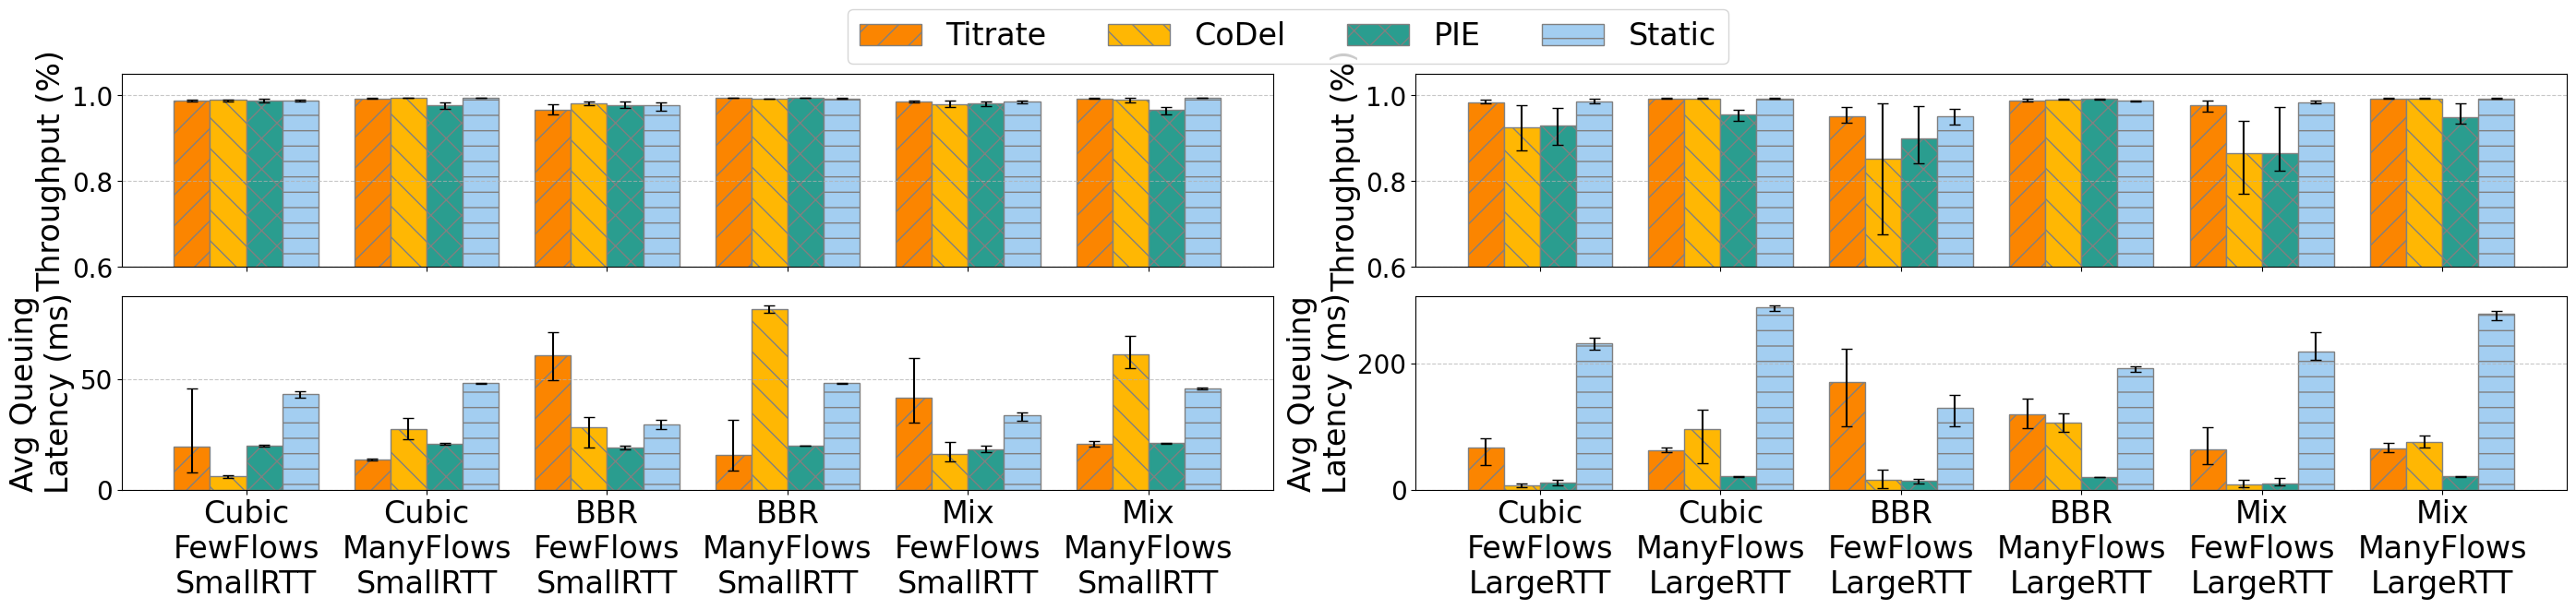

In [4]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','+','x','D']
hatcharr = ["/","\\","x","-"]
xticklabelarr1 = list()
xticklabelarr2 = list()
for ccaname in ["Cubic","BBR","Mix"]:
    for nfname in ["FewFlows","ManyFlows"]:
        bdpname1 = "SmallRTT"
        xticklabelarr1.append(f"{ccaname}\n{nfname}\n{bdpname1}")
        bdpname2 = "LargeRTT"
        xticklabelarr2.append(f"{ccaname}\n{nfname}\n{bdpname2}")

schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000

thptlist_wrap = list()
qlenlist_wrap = list()
for rtt in rttarr:
    for ccaname in ccanamearr:
        for numflowname in numflownamearr:
            thptlist = list()
            qlenlist = list()
            for i in range(len(schemearr)):
                thptlist.append(list())
                qlenlist.append(list())
            for confseed in confseedarr:
                configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                
                for ischeme,scheme in enumerate(schemearr):
                    datator = datadict[configname][scheme]
                    if len(datator)==0 or len(datator[0][arrstart:arrend])==0:
                        thptlist[ischeme].append(0)
                        qlenlist[ischeme].append(0)
                    else:
                        time = datator[0][arrstart:arrend]
                        qlen = datator[1][arrstart:arrend]
                        sent = datator[2][arrstart:arrend]
                        thpt = datator[3][arrstart:arrend]
                        drop = datator[4][arrstart:arrend]
                        thres = datator[5][arrstart:arrend]

                        thptlist[ischeme].append(sum(thpt)/len(thpt))
                        qlenlist[ischeme].append(sum(qlen)/len(qlen) / 1000000 /(1000/8/1000))
            thptlist_wrap.append(thptlist)
            qlenlist_wrap.append(qlenlist)

# Parameters
n_groups = len(ccanamearr)*len(numflownamearr)     # Number of groups
n_bars = len(schemearr)        # Number of bars per group
n_samples = len(thptlist_wrap[0][0])    # Number of samples for each bar

# X positions for groups
x = np.arange(n_groups)

# Bar width
bar_width = 0.8 / n_bars  # Ensure bars fit in each group

# Plot
nr = 2
nc = len(rttarr)
fig,axs = plt.subplots(nr,nc,figsize=(14*nc,3*nr),sharex='col')
# colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i in range(n_bars):
    for inr,rtt in enumerate(rttarr):
        meanthptlist = list()
        maxthptlist = list()
        minthptlist = list()
        meanqlenlist = list()
        maxqlenlist = list()
        minqlenlist = list()
        for icca in range(len(ccanamearr)):
            for inf in range(len(numflownamearr)):
                mythptlist = thptlist_wrap[inr*len(ccanamearr)*len(numflownamearr)+icca*len(numflownamearr)+inf][i]
                mythptlist = [x for x in mythptlist if x!=0]
                meanthptlist.append(sum(mythptlist)/len(mythptlist))
                minthptlist.append(min(mythptlist))
                maxthptlist.append(max(mythptlist))
                myqlenlist = qlenlist_wrap[inr*len(ccanamearr)*len(numflownamearr)+icca*len(numflownamearr)+inf][i]
                myqlenlist = [x for x in myqlenlist if x!=0]
                meanqlenlist.append(sum(myqlenlist)/len(myqlenlist))
                minqlenlist.append(min(myqlenlist))
                maxqlenlist.append(max(myqlenlist))

        # Offset the bars for each group
        if inr==0:
            axs[0,inr].bar(
                x + i * bar_width,              # x positions
                meanthptlist,                   # Mean values for the bars
                bar_width,                     # Width of the bars
                label=schemenamearr[i],            # Label for the legend
                yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                capsize=4,                     # Caps on error bars
                color=colorarr[i],
                hatch=hatcharr[i],
                edgecolor='grey'
            )
        else:
            axs[0,inr].bar(
                x + i * bar_width,              # x positions
                meanthptlist,                   # Mean values for the bars
                bar_width,                     # Width of the bars
                # label=schemenamearr[i],            # Label for the legend
                yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                capsize=4,                     # Caps on error bars
                color=colorarr[i],
                hatch=hatcharr[i],
                edgecolor='grey'
            )

        axs[1,inr].bar(
            x + i * bar_width,              # x positions
            meanqlenlist,                   # Mean values for the bars
            bar_width,                     # Width of the bars
            # label=schemenamearr[i],            # Label for the legend
            yerr=([a - b for a, b in zip(meanqlenlist, minqlenlist)],[a - b for a, b in zip(maxqlenlist, meanqlenlist)]),             # Error bars (std deviation)
            capsize=4,                     # Caps on error bars
            color=colorarr[i],
            hatch=hatcharr[i],
            edgecolor='grey'
        )

for inr,rtt in enumerate(rttarr):
    # Add labels, title, and legend
    axs[0,inr].set_ylabel('Throughput (%)',fontsize=24)
    axs[0,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[0,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,inr].tick_params(axis='y', labelsize=20)
    axs[0,inr].set_ylim(0.6,1.05)

    axs[1,inr].set_ylabel('Avg Queuing\nLatency (ms)',fontsize=24)
    axs[1,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[1,inr].set_xticklabels(xticklabelarr1 if inr==0 else xticklabelarr2,fontsize=24)
    axs[1,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,inr].tick_params(axis='y', labelsize=20)

fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.12),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_thpt/buffer.pdf', bbox_inches='tight', dpi=500)
plt.show()



In [8]:
smoothwindow = 100
smoothcollection = 500
midbw = 1000
sim=200

ccanamearr=["cubic","bbr","realmix"]
numflownamearr=["large"]
rttarr=[50,300]
confseedarr = range(5)

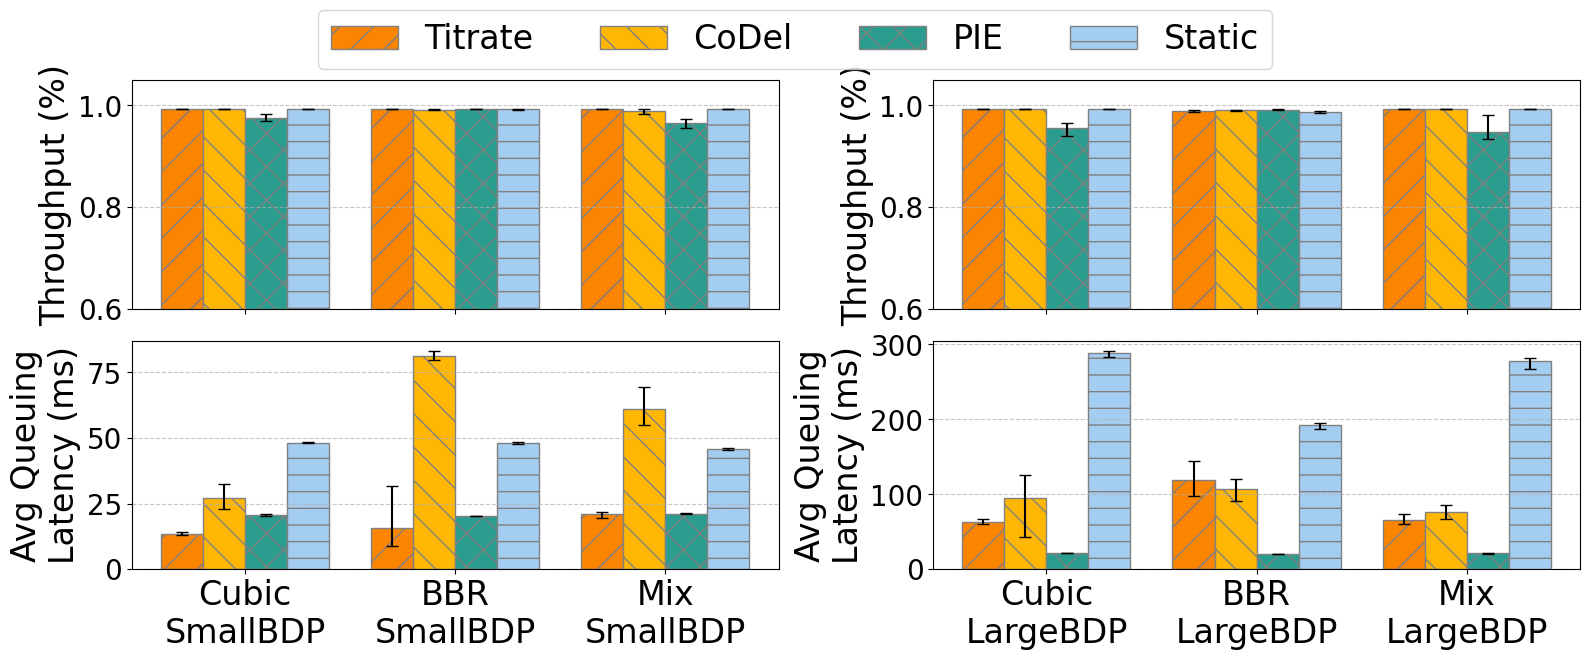

In [12]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','+','x','D']
hatcharr = ["/","\\","x","-"]
xticklabelarr1 = list()
xticklabelarr2 = list()
for ccaname in ["Cubic","BBR","Mix"]:
    bdpname1 = "SmallBDP"
    xticklabelarr1.append(f"{ccaname}\n{bdpname1}")
    bdpname2 = "LargeBDP"
    xticklabelarr2.append(f"{ccaname}\n{bdpname2}")

schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000

thptlist_wrap = list()
qlenlist_wrap = list()
for rtt in rttarr:
    for ccaname in ccanamearr:
        for numflowname in numflownamearr:
            thptlist = list()
            qlenlist = list()
            for i in range(len(schemearr)):
                thptlist.append(list())
                qlenlist.append(list())
            for confseed in confseedarr:
                configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                
                for ischeme,scheme in enumerate(schemearr):
                    datator = datadict[configname][scheme]
                    if len(datator)==0 or len(datator[0][arrstart:arrend])==0:
                        thptlist[ischeme].append(0)
                        qlenlist[ischeme].append(0)
                    else:
                        time = datator[0][arrstart:arrend]
                        qlen = datator[1][arrstart:arrend]
                        sent = datator[2][arrstart:arrend]
                        thpt = datator[3][arrstart:arrend]
                        drop = datator[4][arrstart:arrend]
                        thres = datator[5][arrstart:arrend]

                        thptlist[ischeme].append(sum(thpt)/len(thpt))
                        qlenlist[ischeme].append(sum(qlen)/len(qlen) / 1000000 /(1000/8/1000))
            thptlist_wrap.append(thptlist)
            qlenlist_wrap.append(qlenlist)

# Parameters
n_groups = len(ccanamearr)*len(numflownamearr)     # Number of groups
n_bars = len(schemearr)        # Number of bars per group
n_samples = len(thptlist_wrap[0][0])    # Number of samples for each bar

# X positions for groups
x = np.arange(n_groups)

# Bar width
bar_width = 0.8 / n_bars  # Ensure bars fit in each group

# Plot
nr = 2
nc = len(rttarr)
fig,axs = plt.subplots(nr,nc,figsize=(8*nc,3*nr),sharex='col')
# colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i in range(n_bars):
    for inr,rtt in enumerate(rttarr):
        meanthptlist = list()
        maxthptlist = list()
        minthptlist = list()
        meanqlenlist = list()
        maxqlenlist = list()
        minqlenlist = list()
        for icca in range(len(ccanamearr)):
            for inf in range(len(numflownamearr)):
                mythptlist = thptlist_wrap[inr*len(ccanamearr)*len(numflownamearr)+icca*len(numflownamearr)+inf][i]
                mythptlist = [x for x in mythptlist if x!=0]
                meanthptlist.append(sum(mythptlist)/len(mythptlist))
                minthptlist.append(min(mythptlist))
                maxthptlist.append(max(mythptlist))
                myqlenlist = qlenlist_wrap[inr*len(ccanamearr)*len(numflownamearr)+icca*len(numflownamearr)+inf][i]
                myqlenlist = [x for x in myqlenlist if x!=0]
                meanqlenlist.append(sum(myqlenlist)/len(myqlenlist))
                minqlenlist.append(min(myqlenlist))
                maxqlenlist.append(max(myqlenlist))

        # Offset the bars for each group
        if inr==0:
            axs[0,inr].bar(
                x + i * bar_width,              # x positions
                meanthptlist,                   # Mean values for the bars
                bar_width,                     # Width of the bars
                label=schemenamearr[i],            # Label for the legend
                yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                capsize=4,                     # Caps on error bars
                color=colorarr[i],
                hatch=hatcharr[i],
                edgecolor='grey'
            )
        else:
            axs[0,inr].bar(
                x + i * bar_width,              # x positions
                meanthptlist,                   # Mean values for the bars
                bar_width,                     # Width of the bars
                # label=schemenamearr[i],            # Label for the legend
                yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                capsize=4,                     # Caps on error bars
                color=colorarr[i],
                hatch=hatcharr[i],
                edgecolor='grey'
            )

        axs[1,inr].bar(
            x + i * bar_width,              # x positions
            meanqlenlist,                   # Mean values for the bars
            bar_width,                     # Width of the bars
            # label=schemenamearr[i],            # Label for the legend
            yerr=([a - b for a, b in zip(meanqlenlist, minqlenlist)],[a - b for a, b in zip(maxqlenlist, meanqlenlist)]),             # Error bars (std deviation)
            capsize=4,                     # Caps on error bars
            color=colorarr[i],
            hatch=hatcharr[i],
            edgecolor='grey'
        )

for inr,rtt in enumerate(rttarr):
    # Add labels, title, and legend
    axs[0,inr].set_ylabel('Throughput (%)',fontsize=24)
    axs[0,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[0,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,inr].tick_params(axis='y', labelsize=20)
    axs[0,inr].set_ylim(0.6,1.05)

    axs[1,inr].set_ylabel('Avg Queuing\nLatency (ms)',fontsize=24)
    axs[1,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[1,inr].set_xticklabels(xticklabelarr1 if inr==0 else xticklabelarr2,fontsize=24)
    axs[1,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,inr].tick_params(axis='y', labelsize=20)

fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.12),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_thpt/buffer_many.pdf', bbox_inches='tight', dpi=500)
plt.show()



In [38]:
smoothwindow = 100
smoothcollection = 500
midbw = 1000
sim=200

ccanamearr=["cubic","bbr","realmix"]
numflownamearr=["large","small"]
rttarr=[50,300]
confseedarr = range(5)

/tmp/ipykernel_1739846/3113096754.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(xticklabelarr1,fontsize=24)
/tmp/ipykernel_1739846/3113096754.py:139: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(xticklabelarr2,fontsize=24)
/tmp/ipykernel_1739846/3113096754.py:140: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,2].set_xticklabels(xticklabelarr3,fontsize=24)


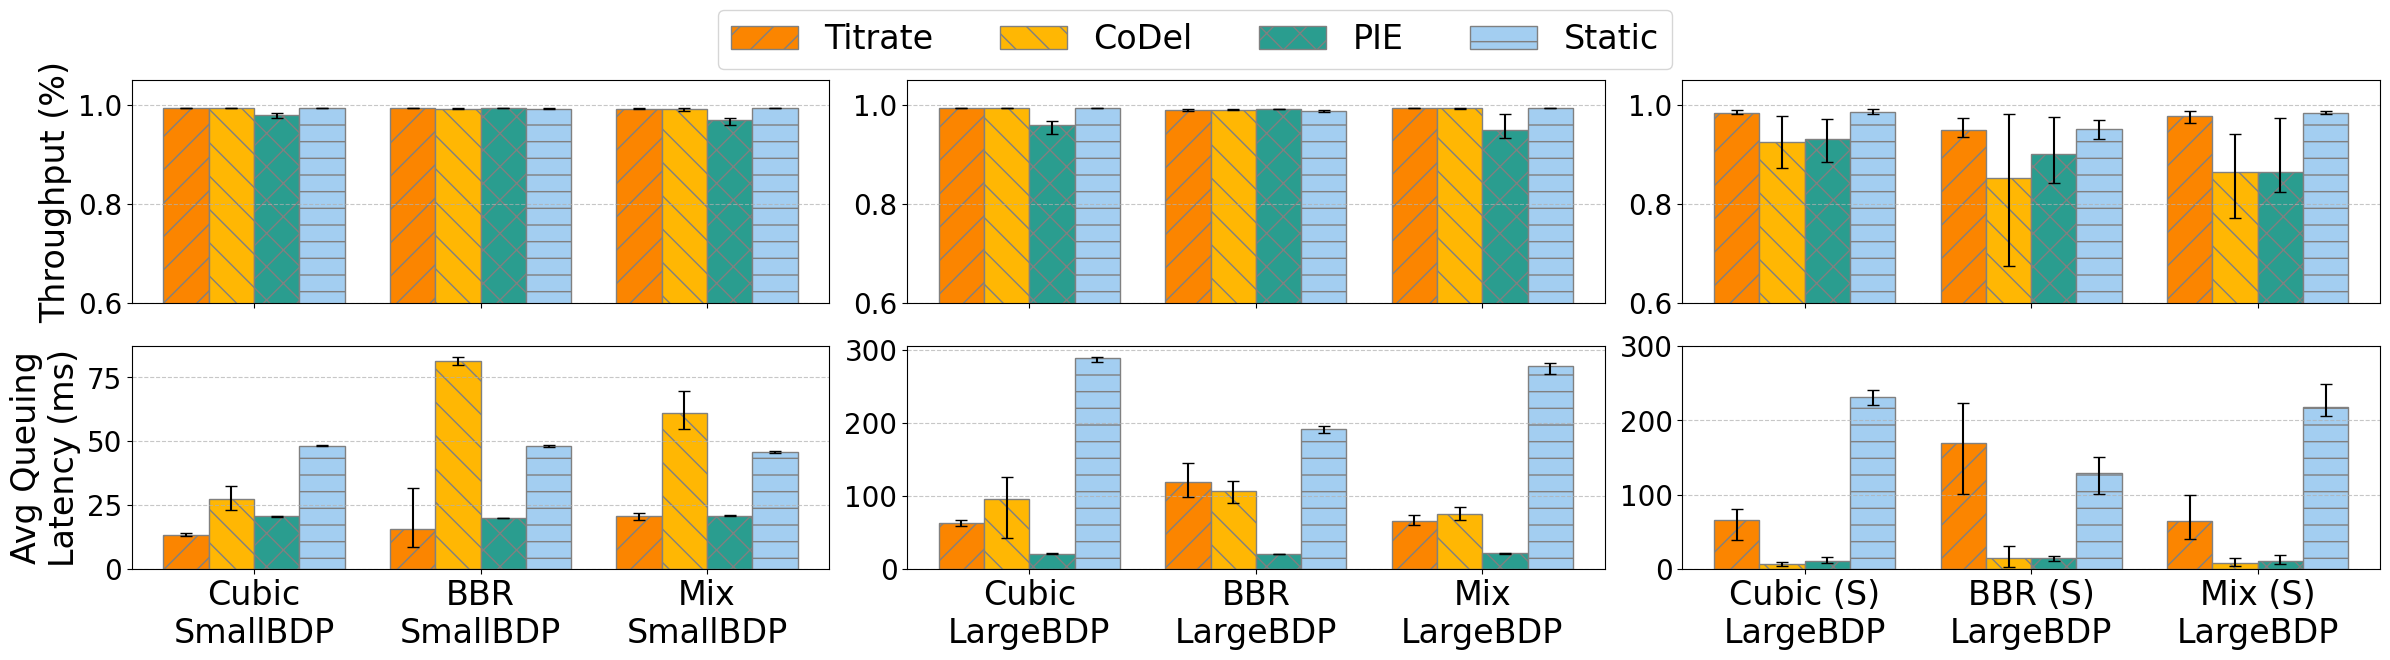

In [39]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','+','x','D']
hatcharr = ["/","\\","x","-"]
xticklabelarr1 = list()
xticklabelarr2 = list()
for ccaname in ["Cubic","BBR","Mix"]:
    bdpname1 = "SmallBDP"
    xticklabelarr1.append(f"{ccaname}\n{bdpname1}")
    bdpname2 = "LargeBDP"
    xticklabelarr2.append(f"{ccaname}\n{bdpname2}")
xticklabelarr3 = list()
for ccaname in ["Cubic (S)","BBR (S)","Mix (S)"]:
    xticklabelarr3.append(f"{ccaname}\nLargeBDP")

schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000

thptlist_wrap = dict()
qlenlist_wrap = dict()
for rtt in rttarr:
    thptlist_wrap[rtt] = dict()
    qlenlist_wrap[rtt] = dict()
    for numflowname in numflownamearr:
        thptlist_wrap[rtt][numflowname] = dict()
        qlenlist_wrap[rtt][numflowname] = dict()
        for ccaname in ccanamearr:
            if numflowname=="small" and rtt==50: continue
            thptlist = list()
            qlenlist = list()
            for i in range(len(schemearr)):
                thptlist.append(list())
                qlenlist.append(list())
            for confseed in confseedarr:
                configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                
                for ischeme,scheme in enumerate(schemearr):
                    datator = datadict[configname][scheme]
                    if len(datator)==0 or len(datator[0][arrstart:arrend])==0:
                        thptlist[ischeme].append(0)
                        qlenlist[ischeme].append(0)
                    else:
                        time = datator[0][arrstart:arrend]
                        qlen = datator[1][arrstart:arrend]
                        sent = datator[2][arrstart:arrend]
                        thpt = datator[3][arrstart:arrend]
                        drop = datator[4][arrstart:arrend]
                        thres = datator[5][arrstart:arrend]

                        thptlist[ischeme].append(sum(thpt)/len(thpt))
                        qlenlist[ischeme].append(sum(qlen)/len(qlen) / 1000000 /(1000/8/1000))
            thptlist_wrap[rtt][numflowname][ccaname]=thptlist
            qlenlist_wrap[rtt][numflowname][ccaname]=qlenlist

# Parameters
n_groups = 3     # Number of groups
n_bars = len(schemearr)        # Number of bars per group
n_samples = 5    # Number of samples for each bar

# X positions for groups
x = np.arange(n_groups)

# Bar width
bar_width = 0.8 / n_bars  # Ensure bars fit in each group

# Plot
nr = 2
nc = 3
fig,axs = plt.subplots(nr,nc,figsize=(8*nc,3*nr),sharex='col')
# colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i in range(n_bars):
    inr=0
    for rtt in rttarr:
        for inf,numflowname in enumerate(numflownamearr):
            if numflowname=="small" and rtt==50: continue
            meanthptlist = list()
            maxthptlist = list()
            minthptlist = list()
            meanqlenlist = list()
            maxqlenlist = list()
            minqlenlist = list()
            for icca,ccaname in enumerate(ccanamearr):
                mythptlist = thptlist_wrap[rtt][numflowname][ccaname][i]
                mythptlist = [x for x in mythptlist if x!=0]
                meanthptlist.append(sum(mythptlist)/len(mythptlist))
                minthptlist.append(min(mythptlist))
                maxthptlist.append(max(mythptlist))
                myqlenlist = qlenlist_wrap[rtt][numflowname][ccaname][i]
                myqlenlist = [x for x in myqlenlist if x!=0]
                meanqlenlist.append(sum(myqlenlist)/len(myqlenlist))
                minqlenlist.append(min(myqlenlist))
                maxqlenlist.append(max(myqlenlist))

            # Offset the bars for each group
            if inr==0:
                axs[0,inr].bar(
                    x + i * bar_width,              # x positions
                    meanthptlist,                   # Mean values for the bars
                    bar_width,                     # Width of the bars
                    label=schemenamearr[i],            # Label for the legend
                    yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                    capsize=4,                     # Caps on error bars
                    color=colorarr[i],
                    hatch=hatcharr[i],
                    edgecolor='grey'
                )
            else:
                axs[0,inr].bar(
                    x + i * bar_width,              # x positions
                    meanthptlist,                   # Mean values for the bars
                    bar_width,                     # Width of the bars
                    # label=schemenamearr[i],            # Label for the legend
                    yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
                    capsize=4,                     # Caps on error bars
                    color=colorarr[i],
                    hatch=hatcharr[i],
                    edgecolor='grey'
                )

            axs[1,inr].bar(
                x + i * bar_width,              # x positions
                meanqlenlist,                   # Mean values for the bars
                bar_width,                     # Width of the bars
                # label=schemenamearr[i],            # Label for the legend
                yerr=([a - b for a, b in zip(meanqlenlist, minqlenlist)],[a - b for a, b in zip(maxqlenlist, meanqlenlist)]),             # Error bars (std deviation)
                capsize=4,                     # Caps on error bars
                color=colorarr[i],
                hatch=hatcharr[i],
                edgecolor='grey'
            )
            inr+=1

axs[0,0].set_ylabel('Throughput (%)',fontsize=24)
axs[1,0].set_ylabel('Avg Queuing\nLatency (ms)',fontsize=24)
axs[1,0].set_xticklabels(xticklabelarr1,fontsize=24)
axs[1,1].set_xticklabels(xticklabelarr2,fontsize=24)
axs[1,2].set_xticklabels(xticklabelarr3,fontsize=24)

for inr in [0,1,2]:
    # Add labels, title, and legend
    axs[0,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[0,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[0,inr].tick_params(axis='y', labelsize=20)
    axs[0,inr].set_ylim(0.6,1.05)
    axs[1,inr].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
    axs[1,inr].grid(axis='y', linestyle='--', alpha=0.7)
    axs[1,inr].tick_params(axis='y', labelsize=20)

axs[1,2].set_ylim(0,300)

fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.12),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_thpt/buffer_main.pdf', bbox_inches='tight', dpi=500)
plt.show()



In [18]:
smoothwindow = 100
smoothcollection = 500
midbw = 1000
sim=200

ccanamearr=["cubic"]
numflownamearr=["small"]
rttarr=[50]
confseedarr = range(5)

/tmp/ipykernel_1739846/2745337998.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(schemenamearr,fontsize=24)


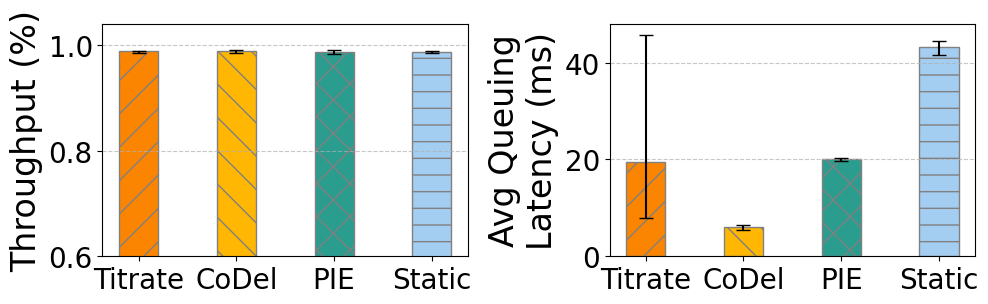

In [24]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','+','x','D']
hatcharr = ["/","\\","x","-"]
# xticklabelarr = ["Cubic","BBR","Mix"]

schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000

nr = 1
nc = 2
fig,axs = plt.subplots(nr,nc,figsize=(5*nc,3*nr))

ccaname = ccanamearr[0]
rtt = rttarr[0]
numflowname = numflownamearr[0]

thptlist = list()
qlatlist = list()
for ischeme,scheme in enumerate(schemearr):

    innerthptlist = list()
    innerqlatlist = list()
    for confseed in confseedarr:
        configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
        
        datator = datadict[configname][scheme]
        time = datator[0][arrstart:arrend]
        qlen = datator[1][arrstart:arrend]
        sent = datator[2][arrstart:arrend]
        thpt = datator[3][arrstart:arrend]
        drop = datator[4][arrstart:arrend]
        thres = datator[5][arrstart:arrend]

        innerthptlist.append(sum(thpt)/len(thpt))
        innerqlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    thptlist.append(innerthptlist)
    qlatlist.append(innerqlatlist)

cthptlist = list()
for l in thptlist:
    cthptlist.append(sum(l)/len(l))
lowererr = list()
uppererr = list()
for il,l in enumerate(thptlist):
    lowererr.append(cthptlist[il]-min(l))
    uppererr.append(max(l)-cthptlist[il])
axs[0].bar(schemenamearr,cthptlist,yerr=[lowererr,uppererr],width=0.4,capsize=5,color=colorarr,hatch=hatcharr,edgecolor='grey')


cqlatlist = list()
for l in qlatlist:
    cqlatlist.append(sum(l)/len(l))
lowererr = list()
uppererr = list()
for il,l in enumerate(qlatlist):
    lowererr.append(cqlatlist[il]-min(l))
    uppererr.append(max(l)-cqlatlist[il])
axs[1].bar(schemenamearr,cqlatlist,yerr=[lowererr,uppererr],width=0.4,capsize=5,color=colorarr,hatch=hatcharr,edgecolor='grey')

axs[0].set_ylabel('Throughput (%)',fontsize=24)
axs[1].set_ylabel('Avg Queuing\nLatency (ms)',fontsize=24)

for i in [0,1]:
    axs[i].set_xticklabels(schemenamearr,fontsize=24)
    axs[i].tick_params(axis='x', labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    
axs[0].set_ylim(0.6,None)
# axs[1].set_yticks([0,50,100,150,200,1000,1100],[0,50,100,150,200,1000,1100])


# fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.12),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_thpt/buffer_single.pdf', bbox_inches='tight', dpi=500)
plt.show()



In [14]:
smoothwindow = 100
smoothcollection = 500
midbw = 1000
sim=200

ccanamearr=["cubic","bbr","realmix"]
numflownamearr=["small"]
rttarr=[50,300]
confseedarr = range(5)

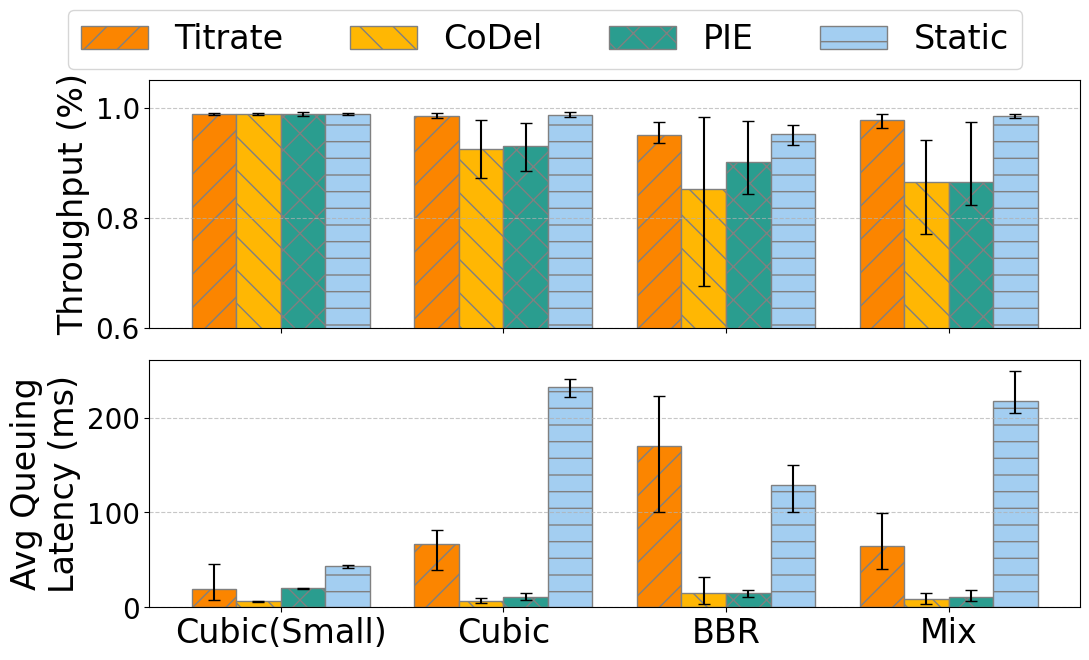

In [24]:
schemearr = ["titrate","codel","pie","static"]
schemenamearr = ["Titrate","CoDel","PIE","Static"]
colorarr = ["#fb8500","#ffb703","#2a9d8f","#a3cef1"]
markerarr = ['*','^','v','+','x','D']
hatcharr = ["/","\\","x","-"]
# xticklabelarr1 = ["Cubic\nSmallBDP"]
# for ccaname in ["Cubic","BBR","Mix"]:
#     bdpname1 = "LargeBDP"
#     xticklabelarr1.append(f"{ccaname}\n{bdpname2}")
xticklabelarr1 = ["Cubic(Small)","Cubic","BBR","Mix"]

schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000

thptlist_wrap = list()
qlenlist_wrap = list()
for ccaname in ccanamearr:
    for rtt in rttarr:
        for numflowname in numflownamearr:
            if ccaname!="cubic" and rtt==50: continue
            thptlist = list()
            qlenlist = list()
            for i in range(len(schemearr)):
                thptlist.append(list())
                qlenlist.append(list())
            for confseed in confseedarr:
                configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"
                
                for ischeme,scheme in enumerate(schemearr):
                    datator = datadict[configname][scheme]
                    if len(datator)==0 or len(datator[0][arrstart:arrend])==0:
                        thptlist[ischeme].append(0)
                        qlenlist[ischeme].append(0)
                    else:
                        time = datator[0][arrstart:arrend]
                        qlen = datator[1][arrstart:arrend]
                        sent = datator[2][arrstart:arrend]
                        thpt = datator[3][arrstart:arrend]
                        drop = datator[4][arrstart:arrend]
                        thres = datator[5][arrstart:arrend]

                        thptlist[ischeme].append(sum(thpt)/len(thpt))
                        qlenlist[ischeme].append(sum(qlen)/len(qlen) / 1000000 /(1000/8/1000))
            thptlist_wrap.append(thptlist)
            qlenlist_wrap.append(qlenlist)

# Parameters
n_groups = 4    # Number of groups
n_bars = len(schemearr)        # Number of bars per group
n_samples = len(thptlist_wrap[0][0])    # Number of samples for each bar

# X positions for groups
x = np.arange(n_groups)

# Bar width
bar_width = 0.8 / n_bars  # Ensure bars fit in each group

# Plot
nr = 2
nc = 1
fig,axs = plt.subplots(nr,nc,figsize=(11*nc,3*nr),sharex='col')
# colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i in range(n_bars):
    meanthptlist = list()
    maxthptlist = list()
    minthptlist = list()
    meanqlenlist = list()
    maxqlenlist = list()
    minqlenlist = list()
    inr = 0
    for icca,ccaname in enumerate(ccanamearr):
        for irtt,rtt in enumerate(rttarr):
            if ccaname!="cubic" and rtt==50: continue
            for inf in range(len(numflownamearr)):
                mythptlist = thptlist_wrap[inr][i]
                mythptlist = [x for x in mythptlist if x!=0]
                meanthptlist.append(sum(mythptlist)/len(mythptlist))
                minthptlist.append(min(mythptlist))
                maxthptlist.append(max(mythptlist))
                myqlenlist = qlenlist_wrap[inr][i]
                myqlenlist = [x for x in myqlenlist if x!=0]
                meanqlenlist.append(sum(myqlenlist)/len(myqlenlist))
                minqlenlist.append(min(myqlenlist))
                maxqlenlist.append(max(myqlenlist))
                inr += 1

    # Offset the bars for each group
    axs[0].bar(
        x + i * bar_width,              # x positions
        meanthptlist,                   # Mean values for the bars
        bar_width,                     # Width of the bars
        label=schemenamearr[i],            # Label for the legend
        yerr=([a - b for a, b in zip(meanthptlist, minthptlist)],[a - b for a, b in zip(maxthptlist, meanthptlist)]),             # Error bars (std deviation)
        capsize=4,                     # Caps on error bars
        color=colorarr[i],
        hatch=hatcharr[i],
        edgecolor='grey'
    )

    axs[1].bar(
        x + i * bar_width,              # x positions
        meanqlenlist,                   # Mean values for the bars
        bar_width,                     # Width of the bars
        # label=schemenamearr[i],            # Label for the legend
        yerr=([a - b for a, b in zip(meanqlenlist, minqlenlist)],[a - b for a, b in zip(maxqlenlist, meanqlenlist)]),             # Error bars (std deviation)
        capsize=4,                     # Caps on error bars
        color=colorarr[i],
        hatch=hatcharr[i],
        edgecolor='grey'
    )

for ccaname in ccanamearr:
    for rtt in rttarr:
        for numflowname in numflownamearr:
            if ccaname!="cubic" and rtt==50: continue
            axs[0].set_ylabel('Throughput (%)',fontsize=24)
            axs[0].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
            axs[0].grid(axis='y', linestyle='--', alpha=0.7)
            axs[0].tick_params(axis='y', labelsize=20)
            axs[0].set_ylim(0.6,1.05)

            axs[1].set_ylabel('Avg Queuing\nLatency (ms)',fontsize=24)
            axs[1].set_xticks(x + bar_width * (n_bars / 2 - 0.5))  # Center group labels
            axs[1].set_xticklabels(xticklabelarr1,fontsize=24)
            axs[1].grid(axis='y', linestyle='--', alpha=0.7)
            axs[1].tick_params(axis='y', labelsize=20)

fig.legend(loc="upper center",ncol=6,bbox_to_anchor=(0.5,1.12),fontsize=24)
plt.tight_layout()
plt.savefig(f'{homedir}Buffer/experiments/nsdi26sp/design_thpt/buffer_few.pdf', bbox_inches='tight', dpi=500)
plt.show()



In [ ]:
# min, avg thpt | avg latency FOR g1(6), g2(1), g3(3), all(10)
confseedarr = range(5)
schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000
for ischeme,scheme in enumerate(schemearr):
    #g1
    thptlist=list()
    qlatlist=list()
    for ccaname in ["cubic","bbr","realmix"]:
        for rtt in [50,300]:
            for numflowname in ["large"]:
                for confseed in confseedarr:
                    configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

                    datator = datadict[configname][scheme]
                    time = datator[0][arrstart:arrend]
                    qlen = datator[1][arrstart:arrend]
                    sent = datator[2][arrstart:arrend]
                    thpt = datator[3][arrstart:arrend]
                    drop = datator[4][arrstart:arrend]
                    thres = datator[5][arrstart:arrend]

                    thptlist.append(sum(thpt)/len(thpt))
                    qlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    print(f"{scheme},{min(thptlist):.4f},{sum(thptlist)/len(thptlist):.4f},{sum(qlatlist)/len(qlatlist):.4f}")

titrate,0.9865,0.9922,49.6297
codel,0.9830,0.9919,74.5863
pie,0.9336,0.9717,20.7331
static,0.9851,0.9920,150.1084


In [4]:
(0.9865-0.9336)/0.9336

0.05666238217652106

In [10]:
confseedarr = range(5)
schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000
for ischeme,scheme in enumerate(schemearr):
    #g4
    thptlist=list()
    qlatlist=list()
    for ccaname in ["cubic","bbr","realmix"]:
        for rtt in [50,300]:
            for numflowname in ["small","large"]:
                if rtt==50 and ccaname!="cubic": continue
                for confseed in confseedarr:
                    configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

                    datator = datadict[configname][scheme]
                    time = datator[0][arrstart:arrend]
                    qlen = datator[1][arrstart:arrend]
                    sent = datator[2][arrstart:arrend]
                    thpt = datator[3][arrstart:arrend]
                    drop = datator[4][arrstart:arrend]
                    thres = datator[5][arrstart:arrend]

                    thptlist.append(sum(thpt)/len(thpt))
                    qlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    print(f"{scheme},{min(thptlist):.4f},{sum(thptlist)/len(thptlist):.4f},{sum(qlatlist)/len(qlatlist):.4f}")

titrate,0.9358,0.9834,72.6884
codel,0.6757,0.9500,42.7349
pie,0.8236,0.9444,17.4050
static,0.9314,0.9844,178.5775


In [3]:
(178.5775-72.6884)/178.5775

0.5929587994008203

In [19]:
confseedarr = range(5)
schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000
for ischeme,scheme in enumerate(schemearr):
    #g4
    thptlist=list()
    qlatlist=list()
    for ccaname in ["cubic","bbr","realmix"]:
        for rtt in [50,300]:
            for numflowname in ["small","large"]:
                if rtt==50 and ccaname!="cubic": continue
                for confseed in confseedarr:
                    configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

                    datator = datadict[configname][scheme]
                    time = datator[0][arrstart:arrend]
                    qlen = datator[1][arrstart:arrend]
                    sent = datator[2][arrstart:arrend]
                    thpt = datator[3][arrstart:arrend]
                    drop = datator[4][arrstart:arrend]
                    thres = datator[5][arrstart:arrend]

                    thptlist.append(sum(thpt)/len(thpt))
                    qlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    # sorted_thptlist = sorted(thptlist)
    # sorted_qlatlist = sorted(qlatlist)
    print(f"{scheme},{min(thptlist):.4f},{sum(thptlist)/len(thptlist):.4f},{sum(qlatlist)/len(qlatlist):.4f},{np.median(qlatlist)}")

titrate,0.9358,0.9834,72.6884,63.08679327
codel,0.6757,0.9500,42.7349,24.42362895
pie,0.8236,0.9444,17.4050,20.08578252
static,0.9314,0.9844,178.5775,200.46511377000002


In [27]:
confseedarr = range(5)
schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000
for ischeme,scheme in enumerate(schemearr):
    #g5(9)
    thptlist=list()
    qlatlist=list()
    for ccaname in ["cubic","bbr","realmix"]:
        for rtt in [50,300]:
            for numflowname in ["small","large"]:
                if rtt==50 and numflowname=="small": continue
                for confseed in confseedarr:
                    configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

                    datator = datadict[configname][scheme]
                    time = datator[0][arrstart:arrend]
                    qlen = datator[1][arrstart:arrend]
                    sent = datator[2][arrstart:arrend]
                    thpt = datator[3][arrstart:arrend]
                    drop = datator[4][arrstart:arrend]
                    thres = datator[5][arrstart:arrend]

                    thptlist.append(sum(thpt)/len(thpt))
                    qlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    print(f"{scheme},{min(thptlist):.4f},{sum(thptlist)/len(thptlist):.4f},{sum(qlatlist)/len(qlatlist):.4f}")

titrate,0.9358,0.9849,66.5159
codel,0.6757,0.9548,53.1313
pie,0.8236,0.9473,17.8136
static,0.9314,0.9859,164.3556


In [31]:
(164.3556-66.5159)/164.3556

0.5952927676331078

In [33]:
confseedarr = range(5)
schemearr = ["titrate","codel","pie","static"]
arrstart = 0
arrend = 200000
for ischeme,scheme in enumerate(schemearr):
    #g6(1)
    thptlist=list()
    qlatlist=list()
    for ccaname in ["cubic"]:
        for rtt in [50]:
            for numflowname in ["small"]:
                for confseed in confseedarr:
                    configname = f"cca{ccaname}_nf{numflowname}_rtt{rtt}_cseed{confseed}"

                    datator = datadict[configname][scheme]
                    time = datator[0][arrstart:arrend]
                    qlen = datator[1][arrstart:arrend]
                    sent = datator[2][arrstart:arrend]
                    thpt = datator[3][arrstart:arrend]
                    drop = datator[4][arrstart:arrend]
                    thres = datator[5][arrstart:arrend]

                    thptlist.append(sum(thpt)/len(thpt))
                    qlatlist.append((sum(qlen)/len(qlen)/1000000) / (1000/8) * 1000)

    print(f"{scheme},{min(thptlist):.4f},{sum(thptlist)/len(thptlist):.4f},{min(qlatlist):.4f},{sum(qlatlist)/len(qlatlist):.4f}")

titrate,0.9865,0.9886,7.9297,19.3880
codel,0.9866,0.9890,5.5228,6.0911
pie,0.9841,0.9879,19.6630,20.0097
static,0.9865,0.9880,41.6234,43.3312
